importing necessary libraries for dataframe handling, numerical operations and plotting 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Understanding problem statement

In [4]:
# Describing the columns

Country: name of the country to which the hapiness score is associated

Region: sub-continental zone of the Country

Happiness rank: happiness classification position

Happiness score: calculated index for level of happiness

Stander error: Happiness score claculation error

Economy: Gross domestic product per population size

Family: family welfare index

Health: Life expectancy(average years-of-living across the entire population)

Freedom: index characterizing the level of freedom

Trust: index characterizing the level of corruption

Generosity: index characterizing how much people like to share with others

Dystopia Residual: the least-factors hapiness score + unexplained value

In [5]:
# problem statement

Here we have a supervised machine learning problem based on regression algorithms/models.

The target variable is the Hapiness Score, and all other variables are features/predictors

# Data exploration and Cleaning; feature engineering and selection

the target variable is ordered from largest to smallest. this may cause the model not to train well. Let’s shuffle the data set 

In [6]:
df0 = df.sample(frac = 1)

In [7]:
df0

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
...,...,...,...,...,...,...,...,...,...,...,...,...
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
72,Estonia,Central and Eastern Europe,73,5.429,0.04013,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680,1.58782
59,Poland,Central and Eastern Europe,60,5.791,0.04263,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759,1.86565
62,Libya,Middle East and Northern Africa,63,5.754,0.07832,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066


In [8]:
#removing unnecessary columns

Here, the aim is to predict the Hapiness Score based on a set of living indices. Therefore, the columns Country, Region, Hapiness Rank, Standard Error are not important for prediction. 

The column Dystopia Residual will also be removed, as its presence makes the model unreliable.

In [9]:
df1 = df0.drop(['Country', 'Region', 'Happiness Rank', 'Dystopia Residual', 'Standard Error'], axis = 1)
df1

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
75,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
147,3.678,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835
71,5.474,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478
12,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
...,...,...,...,...,...,...,...
5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
72,5.429,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680
59,5.791,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759
62,5.754,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295


In [10]:
df1.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
75,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
147,3.678,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835
71,5.474,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478
12,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088


In [11]:
df1.tail()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
72,5.429,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680
59,5.791,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759
62,5.754,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295
141,3.904,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843


We observe that all the variables are float data types

In [12]:
# Information on the data

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 75 to 141
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
dtypes: float64(7)
memory usage: 9.9 KB


We observe again that all variables are float data types. This also shows that there is not missing value

In [13]:
df1.dtypes

Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

In [14]:
# number of unique value in each column compared to the total number of rows/observations/entries

u_val = []
for i in df1.columns:
    u_val.append(df1.shape[0] - df1[i].nunique())

u_val

[1, 0, 0, 1, 0, 1, 0]

There is no significant difference. So, we can confirm that all the variables are float data type

In [15]:
# cross-checking missing values in each column

no_null = []
for i in df1.columns:
    if df1[i].value_counts().sum() == df1.shape[0]:
        no_null.append(i)

no_null

['Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity']

We confirm there is no missing value

In [16]:
# checking for duplicates

df1.loc[df1.duplicated(), :]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity


There are no duplicates

checking for outliers and oddness in the data

In [17]:
# summary statistics of df1
df1.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


- maximum Trust and Generosity are more than double of 3rd quartile. 
- the minimum value for Economy, Family, Health, Freedom, Trus and Generosity are 0, which is very odd. 

In [18]:
# checking the number of 0 in each column

In [19]:
zeros = []

z_col = []
for i in df1['Freedom']:
    if i == 0:
        zeros.append(i)

zeros
        

[0.0]

In [20]:
zero = []

z_col = ['Freedom','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Trust (Government Corruption)',  'Generosity']
for i in z_col:
    for j in df1[i]:
        if j == 0:
            zero.append(j)
        
zero
       

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

We can see that there is only one 0 value in each column

In [21]:
# let's locate the index position of each 0 in each column

In [22]:
df1.loc[df1['Freedom']==0, :]


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
111,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922


In [23]:
df1.loc[df1['Economy (GDP per Capita)']==0, :]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
119,4.517,0.0,1.0012,0.09806,0.22605,0.07625,0.24834


In [24]:
df1.loc[df1['Health (Life Expectancy)']==0, :]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
122,4.507,0.33024,0.95571,0.0,0.4084,0.08786,0.21488


In [25]:
df1.loc[df1['Trust (Government Corruption)']==0, :]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
73,5.399,0.82827,1.08708,0.63793,0.46611,0.0,0.51535


In [26]:
df1.loc[df1['Generosity']==0, :]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
101,4.857,1.15406,0.92933,0.88213,0.07699,0.01397,0.0


In [27]:
df1.loc[df1['Family']==0, :]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
147,3.678,0.0785,0.0,0.06699,0.48879,0.08289,0.23835


In [28]:
# let’s remove zero columns and check data lost

df2 = df1.drop(index = [111,119,122,73,101,147])

print((df1.shape[0] - df2.shape[0])/df1.shape[0]*100)

3.79746835443038


Data lost is 3.8%, which is acceptable

In [29]:
df2.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,5.406125,0.857323,0.998638,0.640089,0.434571,0.146459,0.237477
std,1.152486,0.397080,0.265101,0.237366,0.145711,0.121035,0.125600
min,2.839000,0.015300,0.139950,0.047760,0.092450,0.002270,0.001990
25%,4.561250,0.579618,0.859208,0.460545,0.331247,0.062105,0.148800
50%,5.277000,0.918560,1.035210,0.700925,0.438215,0.110460,0.216130
75%,6.295750,1.171427,1.220705,0.812013,0.554810,0.182365,0.312897
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


- maximum Trust and Generosity are more than double of 3rd quartile.
- there is a big gap between minimum values and first quartile in the columns Economy and Family. So, we are suspecting outliers in the columns Trust, Generosity, Economy and Family

In [30]:
# checking outliers

In [31]:
col = []
for i in df2.columns:
    col.append(i)
    

def graph(columns, data, a, b, c, d):
    plt.figure(figsize = (15, 20), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()

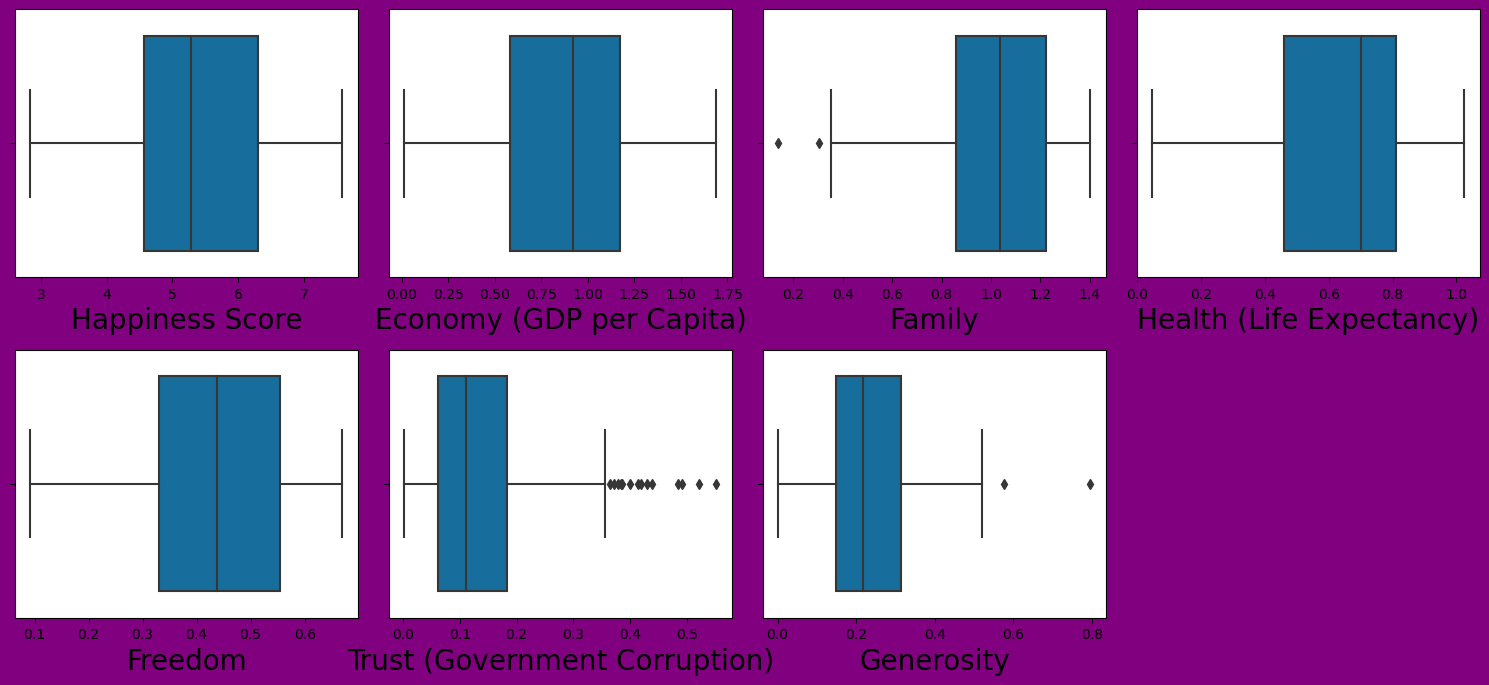

In [32]:
graph(col, df2, 12, 6, 4, 20)

In [33]:
# removing outliers using IQR
Q1 = df2.quantile(0.25)

Q3 = df2.quantile(0.75)

IQR = Q3-Q1

x = Q1-1.5*IQR
y = Q3+1.5*IQR



In [34]:
a = df2[((df2 > x) & (df2 < y)).all(axis = 1)]
a

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
75,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
12,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
77,5.268,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233
26,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363
...,...,...,...,...,...,...,...
38,6.295,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228
72,5.429,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680
59,5.791,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759
62,5.754,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295


In [35]:
# checking data lost
print((df2.shape[0] - a.shape[0])/df2.shape[0]*100)

11.842105263157894


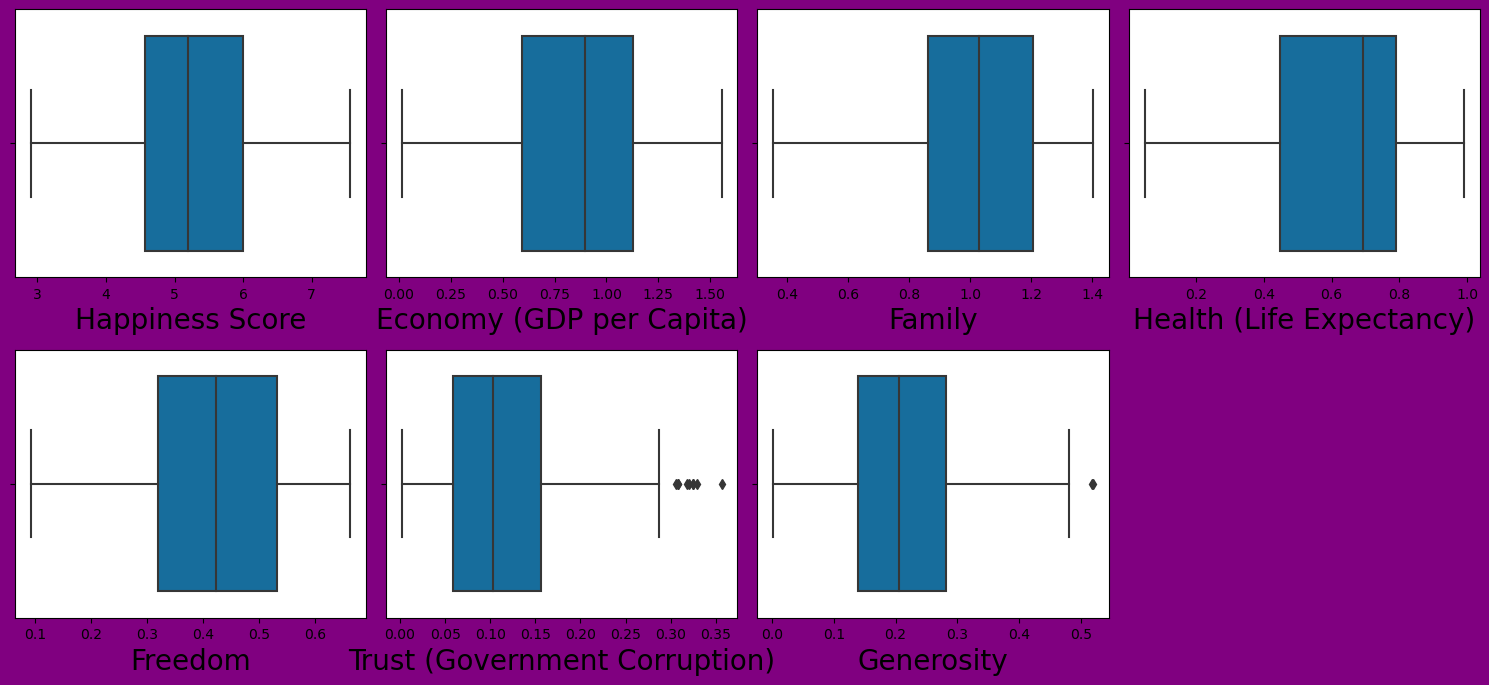

In [36]:
# Visualising

col = []
for i in a.columns:
    col.append(i)
    

graph(col, a, 12, 6, 4, 20)

In [37]:
# removing outliers using zscore

from scipy.stats import zscore
    
z = np.abs(zscore(df2))

z

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
75,0.064530,0.514582,0.198005,0.387309,1.421329,0.091190,0.918211
4,1.759288,1.184943,1.226107,1.122397,1.366091,1.517879,1.762437
71,0.059089,1.335914,0.225342,1.577415,1.112082,1.863299,1.256551
12,1.561672,1.212585,1.129335,1.058107,1.306599,0.334070,0.746111
77,0.120246,0.512854,0.356959,2.028956,0.628179,0.879997,0.278407
...,...,...,...,...,...,...,...
5,1.741007,1.093880,1.209644,1.052569,1.426133,2.215433,0.031691
72,0.019914,0.743906,0.867704,0.564371,0.098524,0.044604,1.203626
59,0.335056,0.677731,1.062877,0.587280,0.665483,0.864910,0.558267
62,0.302845,0.692639,0.454084,0.269296,0.123191,0.300319,0.435570


In [38]:
 # outliers removal and checking data lost. Here, I have choosen z=2.5 because z=3 was still leaving many outliers 
b = df2[(z<2.5).all(axis = 1)]

print((df2.shape[0] - b.shape[0])/df2.shape[0]*100)

5.921052631578947


In [39]:
b

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
75,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
71,5.474,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478
12,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
77,5.268,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233
...,...,...,...,...,...,...,...
5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
72,5.429,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680
59,5.791,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759
62,5.754,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295


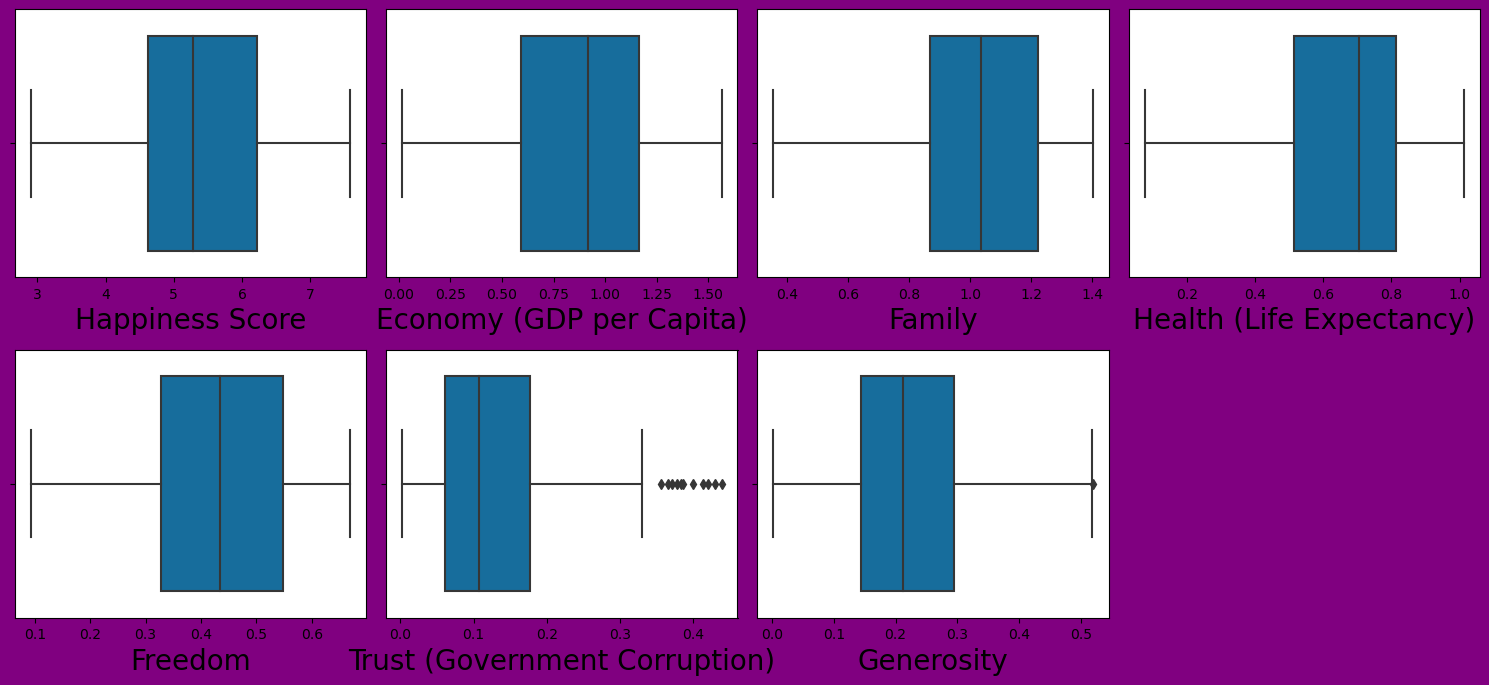

In [40]:
# Visualising 

col = []
for i in b.columns:
    col.append(i)
    

graph(col, b, 12, 6, 4, 20)

data lost using zscore is acceptable. So, we will select zscore for outlier removal

In [41]:
df2 = b

In [42]:
df2

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
75,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
71,5.474,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478
12,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
77,5.268,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233
...,...,...,...,...,...,...,...
5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
72,5.429,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680
59,5.791,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759
62,5.754,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295


In [43]:
df2.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.425329,0.858694,1.007263,0.645532,0.430350,0.137487,0.229954
std,1.111556,0.384250,0.252110,0.231429,0.145710,0.107549,0.115195
min,2.905000,0.015300,0.353860,0.075660,0.092450,0.002270,0.001990
25%,4.621500,0.593865,0.866785,0.514975,0.328480,0.060675,0.144230
50%,5.286000,0.918510,1.035260,0.703800,0.434500,0.107130,0.212300
75%,6.218500,1.164410,1.221780,0.812425,0.548075,0.177215,0.293720
max,7.587000,1.563910,1.402230,1.013280,0.669730,0.438440,0.519120


In [44]:
# distribution of data

def distplot(columns, data, k, t, a, b, c, d):
    plt.figure(figsize = (k, t), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.distplot(data[i], color = 'r')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()

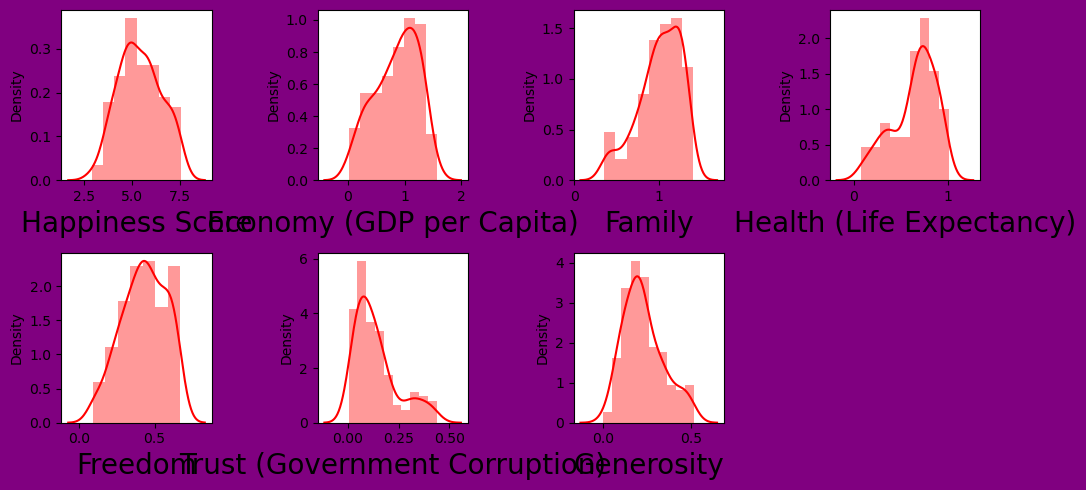

In [45]:
col = []
for i in df2.columns:
    col.append(i)
distplot(col, df2, 10, 5, 7, 2, 4, 20)

columns Health and Trust look a bit skewed 

In [46]:
df2.skew()

Happiness Score                  0.097841
Economy (GDP per Capita)        -0.382561
Family                          -0.763789
Health (Life Expectancy)        -0.709345
Freedom                         -0.290024
Trust (Government Corruption)    1.169821
Generosity                       0.628643
dtype: float64

We can see there is skewness in the columns Health, Trust, Family, and Generosity

In [47]:
# let's remove skewness and check again

In [48]:
# using cbrt and boxcox methods

from scipy import stats

df2['Health (Life Expectancy)'] = stats.boxcox(df2['Health (Life Expectancy)'])[0]
df2['Family'] = stats.boxcox(df2['Family'])[0]
df2['Trust (Government Corruption)'] = np.cbrt(df2['Trust (Government Corruption)'])
df2['Generosity'] = np.cbrt(df2['Generosity'])

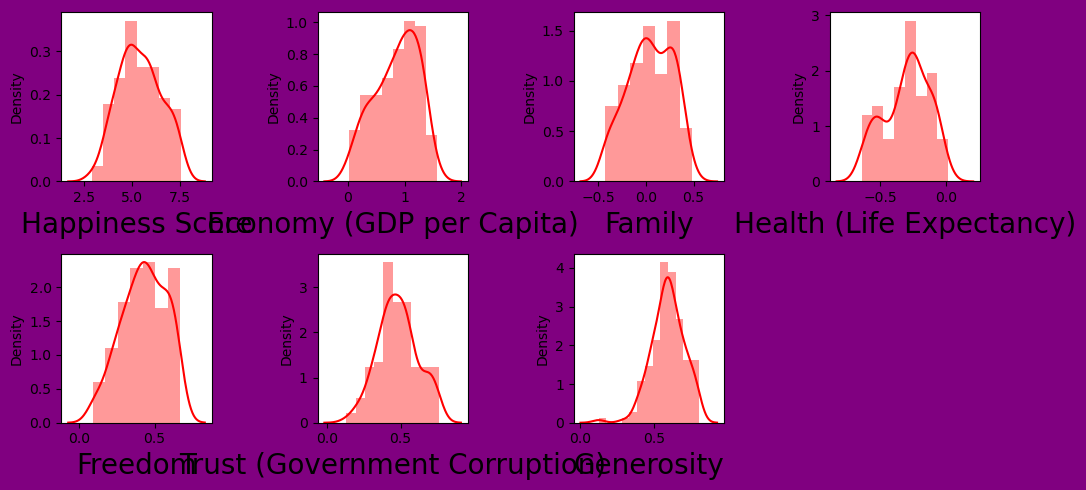

In [49]:
col = []
for i in df2.columns:
    col.append(i)
distplot(col, df2, 10, 5, 7, 2, 4, 20)

In [50]:
df2.skew()

Happiness Score                  0.097841
Economy (GDP per Capita)        -0.382561
Family                          -0.224560
Health (Life Expectancy)        -0.338717
Freedom                         -0.290024
Trust (Government Corruption)    0.079257
Generosity                      -0.558158
dtype: float64

Skewness has all been removed

In [51]:
# Separating features and target

x = df2.drop('Happiness Score', axis = 1)

y = df2['Happiness Score']


In [52]:
x.shape

(143, 6)

In [53]:
y.shape

(143,)

In [54]:
# standardise x
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0.528294,-0.398778,0.309589,-1.392571,0.439766,-0.880735
1,1.221183,1.455025,1.237702,1.395461,1.557669,1.611704
2,1.377227,0.085129,1.862966,1.141396,1.765047,1.272668
3,1.249754,1.308620,1.152400,1.335956,0.674162,0.891521
4,-0.533669,-0.565887,-1.859231,-0.599247,-1.022234,0.496370
...,...,...,...,...,...,...
138,1.127060,1.429907,1.145089,1.455516,1.961042,0.201944
139,0.765324,0.927780,0.523470,0.127616,0.391546,-1.370856
140,0.696926,1.209812,0.551603,0.694699,-0.984523,-0.383968
141,0.712335,0.370174,0.170587,-0.094148,-0.009035,-0.235314


In [55]:
# correlation

df2.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.773313,0.756280,0.737042,0.593613,0.361011,0.166082
Economy (GDP per Capita),0.773313,1.000000,0.661080,0.840587,0.394968,0.202711,-0.029627
Family,0.756280,0.661080,1.000000,0.574098,0.517003,0.203053,0.120258
Health (Life Expectancy),0.737042,0.840587,0.574098,1.000000,0.415164,0.171918,0.101734
Freedom,0.593613,0.394968,0.517003,0.415164,1.000000,0.470933,0.380505
Trust (Government Corruption),0.361011,0.202711,0.203053,0.171918,0.470933,1.000000,0.297095
Generosity,0.166082,-0.029627,0.120258,0.101734,0.380505,0.297095,1.000000


<AxesSubplot:>

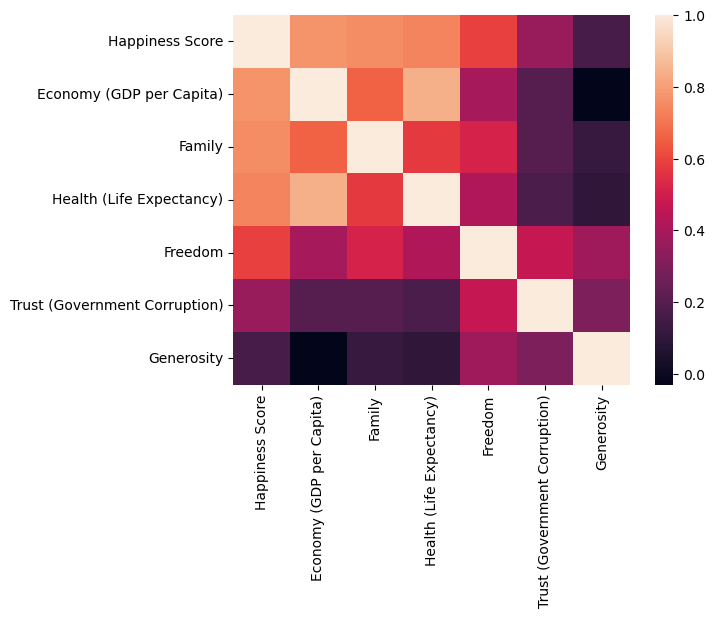

In [56]:
sns.heatmap(df2.corr())

- We observe a very strong correlation between Economy(GDP per Capita) and health(Life Expectancy). In real scenario, countries with higher GDP per capita tend to have a higher life expectancy. So we will drop one of the columns.

In [57]:
df2.corr()['Happiness Score'].sort_values(ascending = False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.773313
Family                           0.756280
Health (Life Expectancy)         0.737042
Freedom                          0.593613
Trust (Government Corruption)    0.361011
Generosity                       0.166082
Name: Happiness Score, dtype: float64

In [58]:
# finding variance inflation in each column
from statsmodels.stats.outliers_influence import variance_inflation_factor

z = []

for i in range(len(x.columns)):
    z.append(variance_inflation_factor(x.values, i))
Vif = pd.DataFrame(z)
Vif['Features'] = x.columns

Vif.rename({Vif.columns[0]: 'VIF Values'}, axis = 'columns', inplace = True)


In [59]:
Vif

,VIF Values,Features
0,4.480980,Economy (GDP per Capita)
1,2.080578,Family
2,3.674922,Health (Life Expectancy)
3,1.889545,Freedom
4,1.342878,Trust (Government Corruption)
5,1.307540,Generosity


Econonmy and Health are equally correlated with Happiness Score at one decimal, but Economy is the highest correlated with other columns. So, we will drop Economy and keep Health

In [60]:
d = x.drop('Economy (GDP per Capita)', axis = 1)

In [61]:
# rechecking variance inflation in each column
from statsmodels.stats.outliers_influence import variance_inflation_factor

z = []

for i in range(len(d.columns)):
    z.append(variance_inflation_factor(d.values, i))
VIF = pd.DataFrame(z)
VIF['Features'] = d.columns

VIF.rename({VIF.columns[0]: 'VIF Values'}, axis = 'columns', inplace = True)


In [62]:
VIF

,VIF Values,Features
0,1.746083,Family
1,1.536386,Health (Life Expectancy)
2,1.888797,Freedom
3,1.314517,Trust (Government Corruption)
4,1.204712,Generosity


All VIF are normal now

In [63]:
x=d

In [64]:
x

,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-0.398778,0.309589,-1.392571,0.439766,-0.880735
1,1.455025,1.237702,1.395461,1.557669,1.611704
2,0.085129,1.862966,1.141396,1.765047,1.272668
3,1.308620,1.152400,1.335956,0.674162,0.891521
4,-0.565887,-1.859231,-0.599247,-1.022234,0.496370
...,...,...,...,...,...
138,1.429907,1.145089,1.455516,1.961042,0.201944
139,0.927780,0.523470,0.127616,0.391546,-1.370856
140,1.209812,0.551603,0.694699,-0.984523,-0.383968
141,0.370174,0.170587,-0.094148,-0.009035,-0.235314


# Modelling

In [65]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn .metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [66]:
# finding the best random state. Here, I tried my own code but was just getting error. this is why I copy-pasted.
# once I do assignment, I will keep trying and will surely come through with my own code

maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('Max r2_score is: ', maxAccu, 'at Random_state: ', maxRs)


Max r2_score is:  0.858283690351634 at Random_state:  68


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 158)

In [68]:
# training the data on each algorithm and CV

L = LinearRegression()
R = RandomForestRegressor()
G = GradientBoostingRegressor()
D = DecisionTreeRegressor()
K = KNN()
l = Lasso()


Mod = [L,R,G,D,K,l]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    score = cross_val_score(model,x,y, cv = 7, scoring = 'r2')
    print('R2_score: ', r2_score(y_test, pred_model))
    print('Mean absolute error: ', mean_absolute_error(y_test, pred_model))
    print('Mean squared error: ', mean_squared_error(y_test, pred_model))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_model)))
    print(score)
    print(score.mean())
    print('The difference between R2 score and cross validation score for ', model, 'is: ', (r2_score(y_test, pred_model) - score.mean()))
    print('\n')

R2_score:  0.740569464511424
Mean absolute error:  0.4225234370110618
Mean squared error:  0.31232782354318434
Root mean squared error:  0.5588629738524322
[0.66899226 0.71591095 0.77071213 0.66549063 0.77168976 0.49488421
 0.83337015]
0.7030071557962737
The difference between R2 score and cross validation score for  LinearRegression() is:  0.03756230871515032


R2_score:  0.685124024030558
Mean absolute error:  0.45784111111111137
Mean squared error:  0.3790784615055555
Root mean squared error:  0.6156934801551462
[0.66534094 0.71779737 0.74540871 0.64008174 0.70430251 0.57801494
 0.83618212]
0.6981611893179824
The difference between R2 score and cross validation score for  RandomForestRegressor() is:  -0.01303716528742438


R2_score:  0.6105082025914358
Mean absolute error:  0.5175880249012145
Mean squared error:  0.4689082769051931
Root mean squared error:  0.6847687762341337
[0.70964295 0.59051956 0.7144635  0.58625543 0.60789344 0.60117758
 0.83970593]
0.6642369123441231
The diffe

Our best performing model is LinearRegression

Hyperparameter tuning

In [69]:
from sklearn.model_selection import GridSearchCV

param = {'alpha': [1.0,.5,2],'fit_intercept':[True,False], 
         'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'], 
        'positive':[True,False],
        'random_state':[5,10,20]}

GV = GridSearchCV(LinearRegression(), param, cv=5)
GV.fit(x_train,y_train)

"from sklearn.model_selection import GridSearchCV\n\nparam = {'alpha': [1.0,.5,2],'fit_intercept':[True,False], \n         'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'], \n        'positive':[True,False],\n        'random_state':[5,10,20]}\n\nGV = GridSearchCV(LinearRegression(), param, cv=5)\nGV.fit(x_train,y_train)"

In [83]:
from sklearn.model_selection import GridSearchCV

param = {'fit_intercept':[True,False], 
        'copy_X':[True,False],
         'n_jobs':[-1,0,1,2],
        'positive':[True,False]
        }

GV = GridSearchCV(LinearRegression(), param, cv=5)
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 0, 1, 2], 'positive': [True, False]})

In [84]:
GV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}

In [91]:
# Tuning LinearRegression

my_model = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = -1, positive = True)
my_model.fit(x_train, y_train)
pred = my_model.predict(x_test)
print('R2_score: ', r2_score(y_test, pred)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test, pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  74.01276934728828
Mean absolute error:  0.42318695556323427
Mean squared error:  0.31285967067795634
Root mean squared error:  0.5593386010977218


saving the model

In [86]:
import pickle

pickle.dump(my_model, open('Happiness_Romuald.pkl', 'wb'))

In [87]:
saved_model = pickle.load(open('Happiness_Romuald.pkl', 'rb'))

In [88]:
saved_model.predict(x_test)

array([5.19743123, 5.82453909, 6.05164665, 5.71023329, 5.47421807,
       4.99895857, 5.80540582, 6.53812412, 5.03292104, 4.67156668,
       3.43609426, 6.47435126, 5.55586847, 5.64108483, 4.92788758,
       4.74098412, 5.81768015, 4.43775676, 4.9511562 , 3.85980716,
       6.90894891, 4.84003837, 5.21519966, 4.55443989, 5.56119837,
       5.29365239, 6.46407745, 3.90863022, 4.20797105, 6.829363  ,
       4.64928511, 3.75199934, 4.20832115, 5.21762883, 5.58671816,
       5.46427295])

In [89]:
y_test

94     4.959
46     5.984
15     6.983
34     6.411
40     6.168
129    4.297
47     5.975
11     7.226
105    4.786
95     4.949
156    2.905
19     6.901
63     5.716
62     5.754
144    3.819
124    4.419
69     5.548
117    4.550
140    3.931
149    3.656
16     6.946
112    4.642
75     5.332
155    3.006
64     5.709
67     5.605
54     5.848
80     5.194
116    4.565
18     6.937
106    4.739
148    3.667
113    4.633
104    4.788
74     5.360
76     5.286
Name: Happiness Score, dtype: float64

# below are just for my own practice

In [94]:
"""GV.best_params_"""

{'criterion': 'friedman_mse',
 'min_impurity_decrease': 0,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 2}

In [96]:
"""my_model1 = RandomForestRegressor(criterion = 'friedman_mse', min_impurity_decrease = 0, n_estimators = 50, n_jobs = -1, 
random_state= 2)
my_model1.fit(x_train, y_train)
pred = my_model1.predict(x_test)
print('R2_score: ', r2_score(y_test, pred)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test, pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred)))"""

"my_model1 = RandomForestRegressor(criterion = 'friedman_mse', min_impurity_decrease = 0, n_estimators = 50, n_jobs = -1, \nrandom_state= 2)\nmy_model1.fit(x_train, y_train)\npred = my_model1.predict(x_test)\nprint('R2_score: ', r2_score(y_test, pred)*100)\nprint('Mean absolute error: ', mean_absolute_error(y_test, pred))\nprint('Mean squared error: ', mean_squared_error(y_test, pred))\nprint('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred)))"

In [ ]:
# tuning GradientBoostingRegressor()

"""param = {'loss':['absolute_error', 'huber'], 
        'learning_rate':[0.1,0.3],
         'n_estimators':[50,100],
        'subsample':[.05,1.0,1.5],
         'criterion':['friedman_mse', 'squared_error'],
         'alpha':[0.4,0.6,0.9]
        }

GV = GridSearchCV(GradientBoostingRegressor(), param, cv=5)
GV.fit(x_train,y_train)"""

In [ ]:
"""param = { 'min_impurity_decrease':[0,0.1,0.3],
         'n_estimators':[50,100],
        'random_state':[2,5,10],
         'criterion':['friedman_mse', 'squared_error'],
         'n_jobs':[-1,0,1]
        }

GV = GridSearchCV(RandomForestRegressor(), param, cv=5)
GV.fit(x_train,y_train)"""